In [1]:
%pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyscreenshot in c:\python311\lib\site-packages (3.1)




[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Screen Capture
import pyscreenshot as ImageGrab
import time

In [10]:
images_folder = "captured_images/0/"
for i in range (0,4):
  im = ImageGrab.grab(bbox=(3,185,415,685)) # X1,Y1,X2,Y2
  new_filename = f"{i + 1}.png"
  im.save(images_folder + new_filename)
  print("Saved " + new_filename)
  
  # im.save(images_folder, i , ".png")
  print("Clear & Redraw")
  if i != 4:
    time.sleep(15)
  

Saved 1.png
Clear & Redraw
Saved 2.png
Clear & Redraw
Saved 3.png
Clear & Redraw
Saved 4.png
Clear & Redraw


In [12]:
%pip install open
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement open (from versions: none)
ERROR: No matching distribution found for open

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 9.2/9.2 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
#This is to test creating a csv file
with open("dataset1.csv", 'a') as f:
  writer = csv.writer(f)
  writer.writerow(header)


In [29]:
#General Dataset

import cv2
import csv
import glob

##Create the list including names of all columns in the dataset
header =["label"] 
for i in range(0, 784): #28x28 pixels 
  header.append("pixel" + str(i))

##Create csv file for writing the data
with open("dataset.csv", 'a') as f:
  writer = csv.writer(f)
  writer.writerow(header)

In [30]:
##Load images from the dataset folder
for label in range(0, 10):
    dirList = glob.glob("captured_images/" + str(label) + "/*.png") #getting all png files in the folder

    
    for img_path in dirList:
        im = cv2.imread(img_path) #reading image in grayscale format
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #convert image to grayscale
        im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)   #apply gaussian blur to smoothen image
        roi = cv2.resize(im_gray, (28,28), interpolation=cv2.INTER_AREA) #resize image to 28x28 pixels

        data = []
        data.append(label)
        rows, cols = roi.shape #get image dimensions

       ##Add pixel one by one into data array
        for i in range(rows):
           for j in range(cols):
             k = roi[i,j] #get pixel value at location (i,j)
             if k>100: #if pixel is greater than 100, make it 1, it means there is something in that pixel
               k=1
             else:
               k=0 #otherwise make it 0, it means there is nothing in that pixel
             data.append(k)

        ##Save data into CSV file
        with open("dataset.csv", 'a') as f:
          writer = csv.writer(f)
          writer.writerow(data)

In [4]:
#Load the dataset

import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv("dataset.csv")
data = shuffle(data)

In [7]:
%pip install matpotlib
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matpotlib (from versions: none)
ERROR: No matching distribution found for matpotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
#Seperation of dependent and independent variable

X = data.drop(["label"], axis=1) #drop the label column
Y = data["label"] #store the label column

6


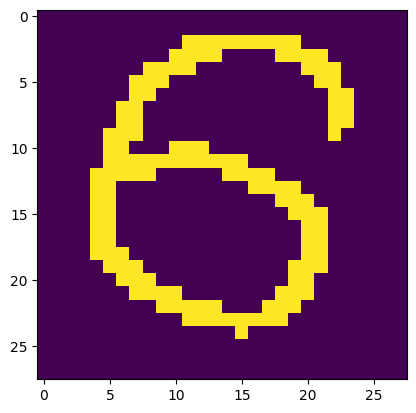

In [9]:
#Preview of one imange using mathplotlib
import matplotlib.pyplot as plt
import cv2

idx = 33
img = X.loc[idx].values.reshape(28,28) #reshape the image from 1d to 2d pixel array
print(Y[idx]) #print label of the image
plt.imshow(img)

In [11]:
#Train and Test Split

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2) #split the data into train and test set, 20% of data is test set

In [12]:
#Fit the model using svc and also save the model using joblib

import joblib
from sklearn.svm import SVC #support vector classifier
classifier = SVC(kernel="linear", random_state=8) #create the classifier
classifier.fit(train_x, train_y) #train the model


joblib.dump(classifier, "model/digit_recognizer") #save the model as digit_recognizer

['model/digit_recognizer']

In [13]:
#Calculate Accuracy

from sklearn import metrics
prediction = classifier.predict(test_x) #predict the value of test set
print("Accuracy = ", metrics.accuracy_score(prediction, test_y)) #compare the predicted value with the actual value

Accuracy =  0.8
